In [59]:
import os
import pickle 
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [62]:
image_size = 90

data_folders = os.listdir('./letters/')

data_folders = [os.path.join('./letters/', d) for d in data_folders if os.path.isdir(os.path.join('./letters/', d))] 

In [67]:
def load_letter(folder):
    files = os.listdir(folder)
    dataset = np.ndarray(shape = (len(files), image_size, image_size), dtype=np.float32)
    img_num = 0
    for image in files:
        if 'DS' not in image:
            image_name = os.path.join(folder, image)
            image_data = ndimage.imread(image_name, mode = 'L')
            dataset[img_num] = image_data
            img_num += 1
    return dataset
def image_pickling(folders):
    dataset_names = []
    for folder in folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        dataset = load_letter(folder)
        try:
            with open(set_filename, 'wb') as f:
                pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
        except Exception as e:
            print('Something is wrong', set_filename, ':', e )
    return dataset_names

In [68]:
datasets = image_pickling(data_folders)

In [74]:
datasets

['./letters/a.pickle',
 './letters/b.pickle',
 './letters/v.pickle',
 './letters/w.pickle']

In [69]:
set_size = 1000

In [115]:
def merge_datasets(pickle_files, set_size):
    num_classes = len(pickle_files)
    dataset = np.ndarray(shape = (set_size * num_classes, image_size, image_size), dtype = np.float32)
    labels = np.ndarray(set_size * num_classes, dtype = np.int32)
    start_pos = 0
    for label, pickle_file in enumerate(sorted(pickle_files)):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                np.random.shuffle(letter_set)
                dataset[start_pos:start_pos + set_size, :, :] = letter_set[:set_size, :, :]
                labels[start_pos:start_pos + set_size] = label
                start_pos += set_size
        except Exception as e:
            print('Something is wrong', pickle_file, ':', e)
    dataset /= 255
    return dataset, labels


In [116]:
dataset, labels = merge_datasets(datasets, set_size)

In [117]:
def randomize(dataset, labels):
    permutaion = np.random.permutation(dataset.shape[0])
    dataset = dataset[permutaion]
    labels = labels[permutaion]
    return dataset, labels

In [118]:
dataset, labels = randomize(dataset, labels)

In [119]:
def check(dataset):
    plt.imshow(dataset[np.random.randint(dataset.shape[0])], cmap = 'gray')
    plt.show()

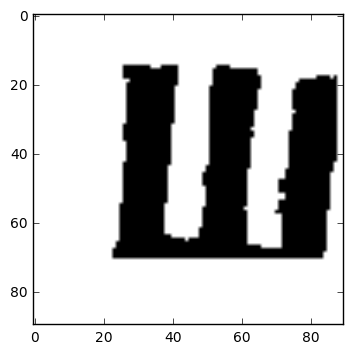

In [120]:
check(dataset)

In [121]:
def shape_adjustment(dataset):
    return dataset.reshape((dataset.shape[0], dataset.shape[1]*dataset.shape[2]))

In [122]:
dataset = shape_adjustment(dataset)

In [123]:
dataset.shape

(4000, 8100)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, random_state = 241)

In [125]:
svc = SVC(kernel = 'linear', random_state = 241)

In [126]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=241, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
svc.score(X_test, y_test)

0.98599999999999999

In [114]:
svc.score(X_train, y_train)

1.0

In [128]:
y_pred = svc.predict(X_test)

In [129]:
confusion_matrix(y_test, y_pred)

array([[239,   0,   0,   0],
       [  0, 249,   2,   0],
       [  0,   2, 256,   2],
       [  4,   0,   4, 242]])

In [112]:
test = ndimage.imread('file.png', mode = 'L')
test = test.reshape(test.shape[0]*test.shape[1]).reshape(1, -1)
svc.predict(test)

array([0], dtype=int32)